In [54]:
print("""
@Description: 
@Author:Stephen CUI
@Time: 2023-04-06 10:53:13
""")


@Description: 
@Author:Stephen CUI
@Time: 2023-04-06 10:53:13



# Example: Visualizing Seattle Bicycle Counts

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

data = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)

In [5]:
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [6]:
data.columns = ['Total', 'East', 'West']

In [7]:
data.dropna().describe()

,Total,East,West
count,147255.000000,147255.000000,147255.000000
mean,110.341462,50.077763,60.263699
std,140.422051,64.634038,87.252147
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,60.000000,28.000000,30.000000
75%,145.000000,68.000000,74.000000
max,1097.000000,698.000000,850.000000


## Visualizing the Data

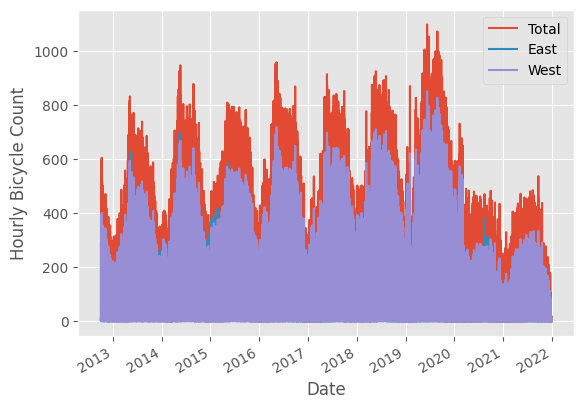

In [13]:
data.plot()
plt.ylabel('Hourly Bicycle Count')
plt.show()

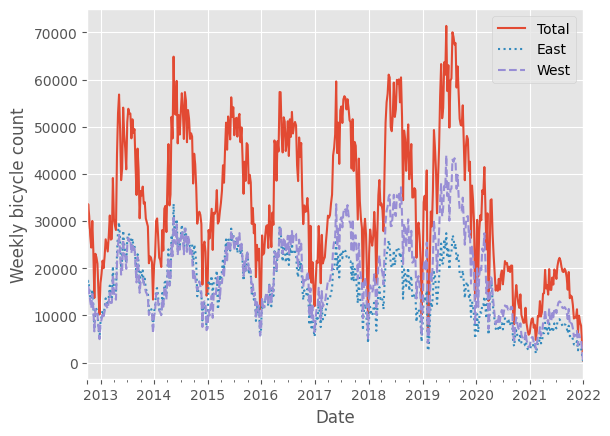

In [16]:
weekly = data.resample('W').sum()
weekly.plot(style=['-', ':', '--'])
plt.ylabel('Weekly bicycle count')
plt.show()

`rolling` 中，如果`center` 为`False`，那么表示前 `window` 个，到当前位置为止，如果为 `True`，则表示当前位置为中心位置。

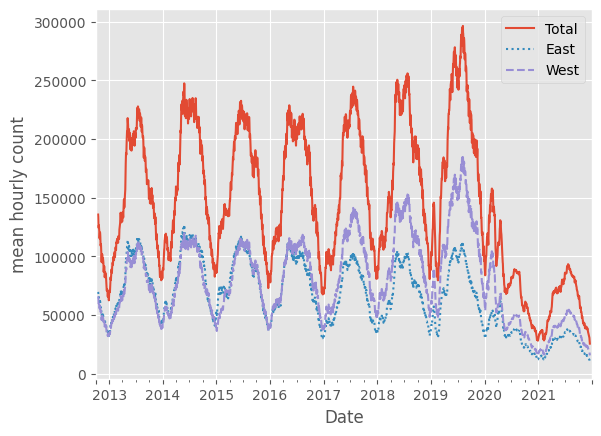

In [18]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-', ':', '--'])
plt.ylabel('mean hourly count')
plt.show()

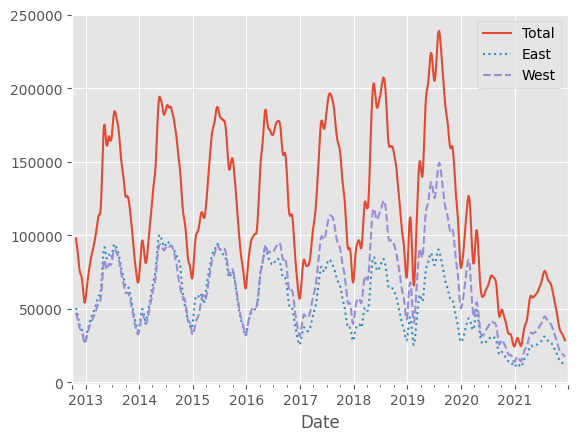

In [27]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=['-', ':', '--'])
plt.show()

## Digging into the Data

In [28]:
import numpy as np

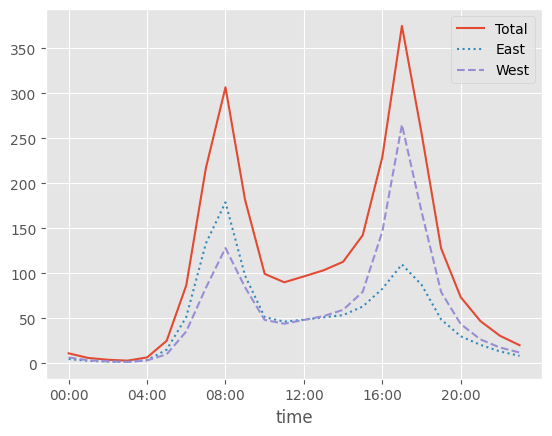

In [31]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-', ':', '--'])
plt.show()

<Axes: >

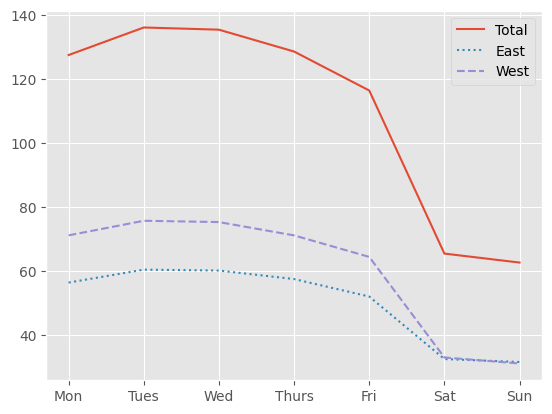

In [32]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-', ':', '--'])

In [35]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

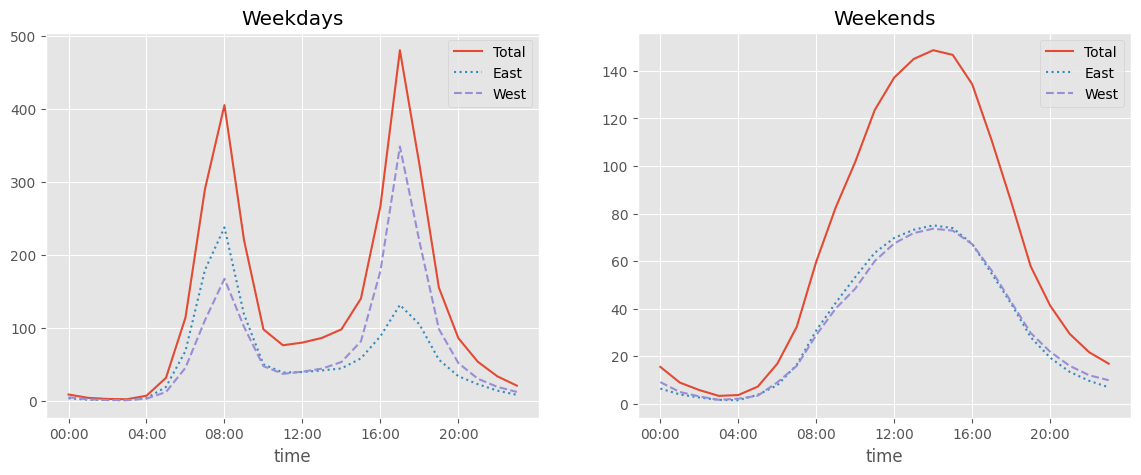

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for type, ax in zip(['Weekday', 'Weekend'], axes.ravel()):
    by_time.loc[type].plot(ax=ax, title=type + 's', xticks=hourly_ticks, style=['-', ':', '--'])